# Lab 1
CMSC 457 Spring 2021  
Prepared by Ethan Hickman (ethanh \[at\] umd.edu)

## What we're going to cover
- Brief overview of quantum programming languages
- What Qiskit offers and the Qiskit stack
- Jupyter speedrun
- A few quantum protocols:
    - Superdense coding
    - Deutsch algorithm
    - Classical query complexity of the Deutsch-Josza algorithm

## Quantum programming languages — an incomplete list
See 'Quantum Programming' on Wikipedia for a more complete list and links to each.

### Quantum assembly
- cQASM: "common QASM," for __hardware agnostic__ intermediate representation (IR)
- OpenQASM (IBM): IR for IBM devices
- Blackbird (Xanadu): IR for Xanadu's photonic devices
- Is this really assembly? (What will devices look like later?)

### Mid-level languages
- Qiskit (IBM); superconducting
- Forest (Rigetti); superconducting
- Ocean (D-Wave); adiabatic

#### Simulator-only
- Strawberry Fields (Xanadu); photonic
- Cirq (Google); superconducting

### Higher level languages
- Imperative vs. Functional
- Q# (Microsoft)
- Silq (ETH): Automatic uncomputation makes programs considerably more concise

## Qiskit

### Python interface

In [1338]:
from qiskit import *
from qiskit.visualization import *

qiskit.__version__

'0.16.4'

### The four elements 
[IBM docs link](https://qiskit.org/documentation/the_elements.html#terra) with more details and precise language.

[Qiskit main docs](https://qiskit.org/documentation/index.html), where things are split up into these four sections.

#### Terra
The bridge from Qiskit to the quantum hardware.
- Experiment setup
    - Where you actually program the sequence of instructions
    - Gates or control pulses directly to the qubits
    - 'Transpilation' – the problem of mapping a circuit to a real device
- Device interaction
    - Communication with IBM cloud
    - Fair queueing system
    - Async job and results API
    
#### Aer
Simulated backends so we can rapidly test and debug small circuits or circuit elements.
- QasmSimulator
    - Ideal and noisy 'shot' simulation (remember: most quantum protocols are __not__ deterministic! Also, noise makes even deterministic protocols non-deterministic in real life.)
    - A few different simulation techniques to handle some circuit classes more efficiently.
- StatevectorSimulator
    - Calculates the full statevector, with dimension exponential in the number of qubits.
- UnitarySimulator
    - Instead of running your circuit, it tells you what the full unitary of your circuit is. This can be expensive to store, because in the worst case, it requires the square of dimension of the Hilbert space!
    
#### Ignis
- Noise, N̷o̵i̵s̷e̷, N̶̗̯̍ö̸̝͉i̴̫͂̈́s̶͓͘ē̵̱͜
- We're always computing in the presence of noise with analog devices. With quantum devices, this means computing on garbage and leads to sad grad students.
- Circuits
    - Template circuit experiments to characterize the intensity and types of noise in a real device.
    - "Poke it with a stick and see what happens"
- Fitters
    - Analysis on what happened with the Ignis circuits
    - "Postmortem on poking it with the stick"
- Filters
    - Fitter analysis $\rightarrow$ error mitigation techniques

#### Aqua
- (A)lgorithms for (QU)antum (A)pplications
    - Modules for chemistry, AI/ML, optimization, finance
    

## Jupyter, but really fast

In [957]:
print("This is Python code in a cell, it gets executed when the cell runs")
"The last thing executed in a cell is 'output.'"

This is Python code in a cell, it gets executed when the cell runs


"The last thing executed in a cell is 'output.'"

In [1426]:
Out  # and Jupyter remembers it!

"The last thing executed in a cell is 'output.'"

In [2]:
assert not (9 + 10 == 21)
assert 9 + 10 == 21, "duH"

AssertionError: duH

In [3]:
foo = 10

In [4]:
foo + 2

12

In [5]:
foo -= 100

In [6]:
def add1(x):
    return x + 1

In [7]:
add1(foo)

-89

In [126]:
import math
import numpy as np

import pprint as pp

'0.16.4'

## Working with circuits

A `QuantumCircuit` has a register of qubits and a register of classical bits for measurement results. 

In [1427]:
# Declare a quantum circuit
# Give it either two registers, 
# one +int for the number of qubits in the quantum register
# two +ints for the number of qubits and bits in the quantum/classical registers



     ┌───┐┌────┐          
q_0: ┤ I ├┤ √X ├──■───────
     ├───┤└────┘┌─┴─┐┌───┐
q_1: ┤ I ├──────┤ X ├┤ Y ├
     ├───┤┌────┐├───┤└───┘
q_2: ┤ I ├┤ √X ├┤ S ├─────
     └───┘└────┘└───┘     
c: 3/═════════════════════
                          


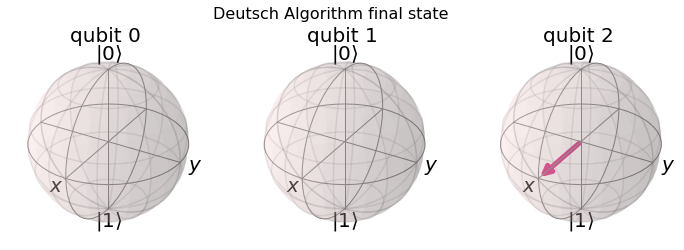

In [1428]:
state = quantum_info.DensityMatrix.from_instruction(qc)

plot_bloch_multivector(state, title="Deutsch Algorithm final state")
# plot_state_city(state, color=['orange', 'cyan'], title="Deutsch Algorithm final state")
# plot_state_hinton(state, title="Deutsch Algorithm final state")

In [1429]:
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw()

┌───┐┌────┐          ┌─┐   
q_0: ┤ I ├┤ √X ├──■───────┤M├───
     ├───┤└────┘┌─┴─┐┌───┐└╥┘┌─┐
q_1: ┤ I ├──────┤ X ├┤ Y ├─╫─┤M├
     ├───┤┌────┐├───┤└───┘ ║ └╥┘
q_2: ┤ I ├┤ √X ├┤ S ├──────╫──╫─
     └───┘└────┘└───┘      ║  ║ 
c: 3/══════════════════════╩══╩═
                           0  1

### Some potential rough patches with quantum programming
- No 'intermediate' or partial measurement on the actual IBM devices
- Limited 'quantum volume' of real experiments
    - Defined as $2^n$ for the largest $n$ that doesn't give garbage for 'square' circuits
- Debugging can be _really_ tough.
    - Depends heavily on analysis and visualization tools and how well you plan to test
    - The information is diffuse in the system
    - Noise + a lot of steps in the pipeline between your keyboard and the device
- Most of the API is stable
    
###  Some great upsides to all quantum programming languages/toolkits
- Most of the API is stable
- Interactive, and you can actually just go and try stuff
- Access to literally the newest in quantum computing research

---
## Superdense coding

We're going to use four entangled pairs of qubits to relay one byte of data at a time. We'll be able to decode $n$ bytes by running $\frac{n}{2}$ different 8-qubit quantum circuits!

Alice wants to send Bob an email, but also has a 2 billion dollar research budget.
How can Alice spend as much money as possible in the name of efficiency? With superdense coding!

First, Alice hires an undergrad named Charlie to press literally two buttons (on demand, this is where the big bucks are) to entangle pairs of qubits. 

Charlie carefully packs one qubit from each pair up for Bob, taking care not to drop it* or let it decohere. Alice gets the other qubit, and secretly applies one of $I$, $Z$, $X$, or $ZX$ to that qubit, then Alice sends the modified qubit to Bob too.

Bob has the qubits from both Charlie and Alice now, and can decode the email with a team of post-docs and liberal application of Bell measurement.

*Yt is actually shockingly inexpensive

In [1433]:
# Set a mapping for qubits to give to Alice and Bob
to_bob = [2*i for i in range(4)]
to_alice = [2*i+1 for i in range(4)]

# to_alice = [2*i for i in range(4)]
# to_bob = [2*i+1 for i in range(4)]

# to_alice = [1, 2, 5, 3]
# to_bob = [7, 4, 0, 6]


# Charlie is our entanglement source.
# Press the button, Charlie.
def charlie(qc, to_alice, to_bob):
    raise NotImplementedError("Can I do research with you?")
    

# Alice encodes byte by byte, four 'crumbs' at a time.
# (a crumb is a pair of bits; not quite a nibble and much less than a byte)
def alice(qc, byte, to_alice):
    # This byte has the bits ordered 'n(n-1)...3210'
#     print(f"{byte:08b}")

    # A crumb is the word for 2 bits!
    # Given a big-endian byte, we want little-endian list of crumbs.
    # Grab the bits in zero padded pairs with a combo of shift 
    #   and bitwise AND.
    
    # This list will have the bits in pairs ['10', '32', ..., 'n(n-1)']
    crumbs = [f"{(byte >> 2*s) & 0b11:02b}" for s in range(4)]
#     print(crumbs)
    
    # cidx for 'crumb index'
    for cidx in range(4):
        pass
    
    raise NotImplementedError("I don't have time for this")

            
def bob(qc, to_alice, to_bob):
    raise NotImplementedError("You've got mail!")
    

# Write the quantum circuit
qc = qiskit.QuantumCircuit(8)

# charlie(qc, to_alice, to_bob)
# qc.barrier()
# print("Circuit after Charlie:")
# print(qc)

# Test all four crumbs, 00 01 10 11, at once
# b = 
# alice(qc, b[0], to_alice)
# qc.barrier()
# print("Circuit after Alice:")
# print(qc)

# bob(qc, to_alice, to_bob)
# # measure_all applies a barrier()
# qc.measure_all()
# print("Circuit after Bob:")
# print(qc)

In [1432]:
# Noiseless simulation
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1)
result = job.result()
print("Counts:", result.get_counts(qc))

QiskitError: 'No counts for experiment "     \nq_0: \n     \nq_1: \n     \nq_2: \n     \nq_3: \n     \nq_4: \n     \nq_5: \n     \nq_6: \n     \nq_7: \n     "'

In [1365]:
res = list(result.get_counts(qc))[0]
print(res)

permutation = list(zip(to_alice, to_bob))[::-1]
print("permutation:", permutation)

# string index = 7-qubit index 
reconstructed_crumbs = [''.join([res[7-qidx] for qidx in tup]) for tup in permutation]
print("crumbs:", reconstructed_crumbs)

reconstructed_byte = ''.join(reconstructed_crumbs)
print("reconstructed:", reconstructed_byte)


00011011
permutation: [(7, 6), (5, 4), (3, 2), (1, 0)]
crumbs: ['00', '01', '10', '11']
reconstructed: 00011011


In [1366]:
from collections import Counter
states_from_alice = []
msg = """Hi, Bob!

  Lovely weather today.

From,
Alice"""


backend = Aer.get_backend('statevector_simulator')

byte_arr = bytearray()
byte_arr.extend(map(ord, msg))


for byte in byte_arr:
    qc = QuantumCircuit(8)
    
    charlie(qc, to_alice, to_bob)
    alice(qc, byte, to_alice)
    
    job = execute(qc, backend)
    result = job.result()
    hidden_state = result.get_statevector()
    states_from_alice.append(hidden_state)

backend = Aer.get_backend('qasm_simulator')
decoded = []
for state in states_from_alice:
    qc = qiskit.QuantumCircuit(8)
    qc.initialize(state, range(8))
    bob(qc, to_alice, to_bob)
    qc.measure_all()
    
    job = execute(qc, backend, memory=True, shots=1)
    result = job.result()
    
    # Works for a noisy simulation
#     counts = result.get_counts()
#     measured_binary = Counter(counts).most_common(1)[0][0]
    
    # Works for a noiseless simulation
    measurements = result.get_memory()
    measured_binary = measurements[0]
    
    reconstructed_crumbs = [''.join([measured_binary[7-qidx] for qidx in tup]) for tup in permutation]
    reconstructed_byte = ''.join(reconstructed_crumbs)
    
    received_char = chr(int(reconstructed_byte, 2))
    decoded.append(received_char)


In [1367]:
print(''.join(decoded))

Hi, Bob!

  Lovely weather today.

From,
Alice


---
## Deutsch's Algorithm

We have a black box circuit to apply to one bit $x$, that performs the mapping
$$|x,y\rangle \mapsto |x,y \oplus f(x)\rangle,$$
where $f(x)$ is also a single bit.

We want to learn whether $f(x)$ is _constant_ or _balanced_. A constant function takes $0$ for all inputs or it takes $1$ for all inputs. A balanced function takes $0$ on half of the inputs and $1$ on the other half.

$f$ constant, 2 cases:
$$|00\rangle \mapsto |00\rangle$$
$$|10\rangle \mapsto |10\rangle$$
or,
$$|00\rangle \mapsto |01\rangle$$
$$|10\rangle \mapsto |11\rangle$$
---
$f$ balanced, 2 cases:
$$|00\rangle \mapsto |00\rangle$$
$$|10\rangle \mapsto |11\rangle$$
or,
$$|00\rangle \mapsto |01\rangle$$
$$|10\rangle \mapsto |10\rangle$$


     ┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════
               


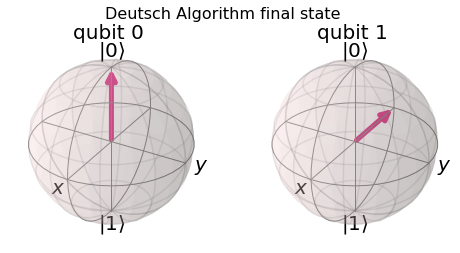

In [1423]:
rng = np.random.default_rng()

qc = QuantumCircuit(2,1)

qc.x(1)
qc.h(range(2))
print(qc)

# Randomly applies a balanced or constant function
def get_random_fn(qc):
    r = rng.integers(4)
    if r == 0:
        pass
    elif r == 1:
        qc.x(1)
    elif r == 2:
        qc.cx(0, 1)
    elif r == 3:
        qc.cx(0, 1)
        qc.x(1)
    return r
    
#     Here, r1 determines constant or balanced
#     r1, r2 = np.random.choice(2, 2)
#     if r1 == 0:
#         pass
#     else:
#         qc.cx(0, 1)
    
#     if r2 == 0:
#         pass
#     else:
#         qc.x(1)
#     return r1


hidden_fn = get_random_fn(qc)

qc.h(0)

state = quantum_info.DensityMatrix.from_instruction(qc)

qc.measure(0, 0)
# plot_state_city(state, color=['orange', 'blue'], title="Deutsch Algorithm final state")
# plot_state_hinton(state, title="Deutsch Algorithm final state")
plot_bloch_multivector(state, title="Deutsch Algorithm final state")


In [1420]:
from qiskit.test.mock import FakeVigo
backend = FakeVigo()
noisy_sim = providers.aer.QasmSimulator.from_backend(backend)
job = execute(qc, noisy_sim)
result = job.result()

In [1421]:
pp.pprint(result.get_counts())
print("Hidden random choice:", hidden_fn)
print("(0 or 1: constant, 2 or 3: balanced)")

{'0': 34, '1': 990}
Hidden random choice: 2
(0 or 1: constant, 2 or 3: balanced)


In [1437]:
class DeutschJoszaExperiment(object):
    rng = np.random.default_rng()
    
    def __init__(self, n):
        self.num_wires = n
        self.num_states = 2**self.num_wires
        self.num_queries = 0
        self.num_unique_queries = 0
        self.queries = set()
        
        # Randomly decide whether to return 0s or 1s
        self.to_return = rng.integers(2)
        
        # Randomly decide whether to be constant or balanced
        self.is_const = rng.integers(2)
        
        if not self.is_const:
            self.truth_table = np.zeros(self.num_states, dtype=int)
            self.truth_table[:self.num_states//2] = 1
            rng.shuffle(self.truth_table)
        else:
            if self.to_return == 0:
                self.truth_table = np.zeros(self.num_states, dtype=int)
            else:
                self.truth_table = np.ones(self.num_states, dtype=int)
        
    def get_num_wires(self):
        return self.num_wires
    
    def get_num_states(self):
        return self.num_states
    
    def get_num_queries(self):
        return self.num_queries
    
    def get_certificate(self):
        return self.truth_table
    
    def query(self, q):
        if q < 0 or q > num_states-1:
            raise ValueError(f"Query for input {q} outside bounds: [{0},{self.num_wires})")
            
        self.num_queries += 1
        if q not in self.queries:
            self.num_unique_queries += 1
            self.queries.add(q)
        return self.truth_table[q]


In [1455]:
num_wires = 3

dje = DeutschJoszaExperiment(num_wires)
num_states = adje.get_num_states()

queries = list(range(num_states))

seen = None

q = queries[0]
first_query = dje.query(q)
print(f"Query{0}: f({q}) = {first_query}")

for qidx in range(1, len(queries)):
    q = queries[qidx]
    query_result = dje.query(q)
    print(f"Query{qidx}: f({q}) = {query_result}")
    
    if query_result != first_query:
        print(f"Learned f is balanced in {qidx} queries.")
        break
        
    if dje.get_num_queries() > num_states//2:
        print(f"Confirmed f constant")
        break

print(f"Hidden truth table: {dje.get_certificate()}")

Query0: f(0) = 0
Query1: f(1) = 0
Query2: f(2) = 1
Learned f is balanced in 2 queries.
Hidden truth table: [0 0 1 0 0 1 1 1]


In [917]:
class AdversarialDeutschJoszaExperiment(object):
    rng = np.random.default_rng()
    
    def __init__(self, n):
        self.num_wires = n
        self.num_states = 2**self.num_wires
        self.num_queries = 0
        self.num_unique_queries = 0
        self.queries = set()
        self.ordered_queries = []
        
        # Randomly decide whether to return 0s or 1s
        self.to_return = rng.integers(2)
        
        # Randomly decide whether to be constant or balanced
        self._is_const = rng.integers(2)
        
        # If the function is constant we _want_ its truth table
        # to match the desired return value. If it's balanced, we
        # want it to be the opposite so we can mark queried items
        # with the return value.
        if self._is_const:
            if self.to_return == 0:
                self.truth_table = np.zeros(self.num_states, dtype=int)
            else:
                self.truth_table = np.ones(self.num_states, dtype=int)
        else:
            if self.to_return == 0:
                self.truth_table = np.ones(self.num_states, dtype=int)
            else:
                self.truth_table = np.zeros(self.num_states, dtype=int)
    
    def get_num_wires(self):
        return self.num_wires
    
    def get_num_states(self):
        return self.num_states
    
    def get_num_queries(self):
        return self.num_queries
    
    def get_truth_table(self):
        return self.truth_table
    
    def get_constant_certificate(self):
        if self._is_const:
            return self.truth_table
        
        if self.num_unique_queries > self.num_states // 2:
            return None

        # implicit else; f balanced and fewer than half of values queried
        if self.to_return == 0:
            cert = np.zeros(self.num_states, dtype=int)
        else:
            cert = np.ones(self.num_states, dtype=int)
        return cert
        
        
    def get_balanced_certificate(self):
        # The certificate can always be prepared. It may
        # not be returned on purpose.
        if self.to_return == 0:
            cert = np.ones(self.num_states, dtype=int)
        else:
            cert = np.zeros(self.num_states, dtype=int)
    
        # Fill the known positions
        for q in self.ordered_queries:
            cert[q] = self.to_return
        
        # randomly balance the truth table,
        # respecting the queries already made
        if self.num_unique_queries <= self.num_states // 2:
            for _ in range(self.num_unique_queries, self.num_states//2):
                # Since the truth table is at most half full,
                q = rng.integers(self.num_queries, self.num_states)
                while cert[q] == self.to_return:
                    q = rng.integers(self.num_states)

                cert[q] = self.to_return
            return cert
        
        # implicit else; self.num_unique_queries > self.num_states // 2
        if not self._is_const:
            # If more than half of the inputs have been queried,
            # only return a certificate if the function is actually
            # balanced, otherwise, at this point, there is no
            # certificate the oracle could present for a balanced 
            # function.
            return cert
        
        return None
        
    
    def query(self, q):
        if q < 0 or q > num_states-1:
            raise ValueError(f"Query for input {q} outside bounds: [{0},{self.num_wires})")
        
        if q in self.queries:
            # This number has already been queried.
            # Change the total number of queries;
            # Leave the number of unique queries the same
            self.num_queries += 1
            return self.truth_table[q]
        
        # implicit else
        # A new number has been queried.
        self.num_queries += 1
        self.num_unique_queries += 1

        # Save all queries for fast lookup
        self.queries.add(q)

        # Only save the first num_states/2 queries to write
        # into a certificate
        if self.num_unique_queries <= self.num_states // 2:
            self.ordered_queries.append(q)

        if self._is_const:
            return self.to_return

        # implicit else; the function is balanced
        if self.num_unique_queries <= (self.num_states // 2):
            # The truth table can still be updated to
            # adversarially return the same value as all
            # prior queries
            self.truth_table[q] = self.to_return
            return self.to_return

        # implicit else; f balanced and more than half queried
        # The gig's up, return the other value
        return 1 - self.to_return

In [1456]:
rng = np.random.default_rng()

num_wires = 3

adje = AdversarialDeutschJoszaExperiment(num_wires)
num_states = adje.get_num_states()

queries = list(range(num_states))

# Demo in or out of order
# rng.shuffle(queries)

# Demo random selection of n/2 + 1 queries
# queries = rng.choice(num_states, num_states//2 + 1, replace=False)

print("Ordered queries to make (function inputs):", queries)

# qidx for 'query index'
for qidx in range(len(queries)):
    print(f"Query {qidx+1} on index {queries[qidx]}:", adje.query(queries[qidx]))
    bal_cert = adje.get_balanced_certificate()
    const_cert = adje.get_constant_certificate()
    num_possible_certs = 1 if (const_cert is None) else math.comb(num_states - (qidx+1), num_states//2)
    
    print(f"One of {num_possible_certs} balanced certificates satisfying all prior queries:")
    print('\t', bal_cert)
    print(f"The constant certificate satisfying all prior queries")
    print('\t', const_cert)
    print()


Ordered queries to make (function inputs): [0, 1, 2, 3, 4, 5, 6, 7]
Query 1 on index 0: 0
One of 35 balanced certificates satisfying all prior queries:
	 [0 0 0 1 0 1 1 1]
The constant certificate satisfying all prior queries
	 [0 0 0 0 0 0 0 0]

Query 2 on index 1: 0
One of 15 balanced certificates satisfying all prior queries:
	 [0 0 0 1 0 1 1 1]
The constant certificate satisfying all prior queries
	 [0 0 0 0 0 0 0 0]

Query 3 on index 2: 0
One of 5 balanced certificates satisfying all prior queries:
	 [0 0 0 1 1 0 1 1]
The constant certificate satisfying all prior queries
	 [0 0 0 0 0 0 0 0]

Query 4 on index 3: 0
One of 1 balanced certificates satisfying all prior queries:
	 [0 0 0 0 1 1 1 1]
The constant certificate satisfying all prior queries
	 [0 0 0 0 0 0 0 0]

Query 5 on index 4: 1
One of 1 balanced certificates satisfying all prior queries:
	 [0 0 0 0 1 1 1 1]
The constant certificate satisfying all prior queries
	 None

Query 6 on index 5: 1
One of 1 balanced certificates 